In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [36]:
# subir angulos y distancia paara regresion de S1, S2 y S3
df = pd.read_excel('angulos y distancias para regresion 10 casos brazo negro.xlsx')
df1 = pd.read_excel('angulo S0 para regresion brazo negro.xlsx')
print(df.head())
print(df.shape)
print(df1.head())
print(df1.shape)

   distancia   S1  S2   S3
0         10  105  65  108
1         12   92  70  110
2         14   70  75  113
3         16   65  90  120
4         18   60  95  123
(11, 4)
   angulo     S0
0      21   0.01
1      25   5.00
2      31  10.00
3      33  15.00
4      39  20.00
(36, 2)


In [37]:
# crear variables para estimar GPR
y1 = df.S1
y1 = y1.as_matrix()

y2 = df.S2
y2 = y2.as_matrix()

y3 = df.S3
y3 = y3.as_matrix()

y0 = df1.S0
y0 = y0.as_matrix()

# Create separate object for input features
X = df.distancia
X = X.as_matrix()
X = X.reshape(-1, 1)

# crear X paraS0
X0 = df1.angulo
X0 = X0.as_matrix()
X0 = X0.reshape(-1, 1)

In [38]:
# Estimar GPR para cada DOF

dy1 = 0.5 + 1.0 * np.random.random(y1.shape)
dy2 = 0.5 + 1.0 * np.random.random(y2.shape)
dy3 = 0.5 + 1.0 * np.random.random(y3.shape)
dy0 = 0.5 + 1.0 * np.random.random(y0.shape)

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

gp1 = GaussianProcessRegressor(kernel=kernel, alpha=(dy1 / y1) ** 2,
                              n_restarts_optimizer=10)
gp2 = GaussianProcessRegressor(kernel=kernel, alpha=(dy2 / y2) ** 2,
                              n_restarts_optimizer=10)
gp3 = GaussianProcessRegressor(kernel=kernel, alpha=(dy3 / y3) ** 2,
                              n_restarts_optimizer=10)
gp0 = GaussianProcessRegressor(kernel=kernel, alpha=(dy0 / y0) ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp1.fit(X, y1)
gp2.fit(X, y2)
gp3.fit(X, y3)
gp0.fit(X0, y0)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred1, sigma = gp1.predict(X, return_std=True)
y_pred2, sigma = gp2.predict(X, return_std=True)
y_pred3, sigma = gp3.predict(X, return_std=True)
y_pred0, sigma = gp0.predict(X0, return_std=True)

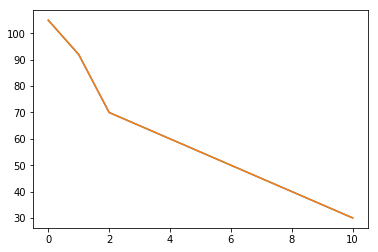

In [39]:
import matplotlib.pyplot as plt
plt.plot(y1)
plt.plot(y_pred1)
plt.show()


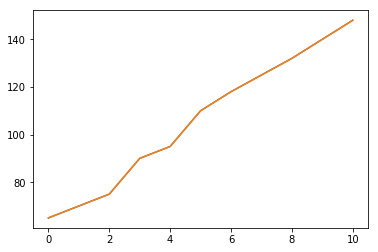

In [40]:
plt.plot(y2)
plt.plot(y_pred2)
plt.show()

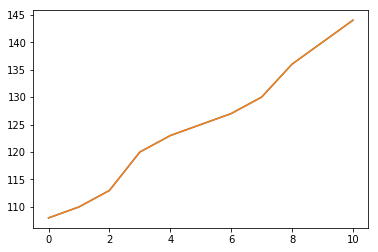

In [41]:
plt.plot(y3)
plt.plot(y_pred3)
plt.show()

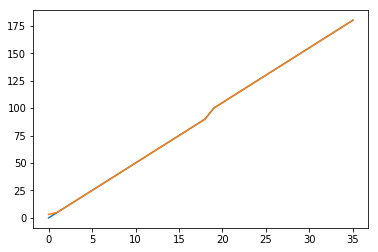

In [42]:
plt.plot(y0)
plt.plot(y_pred0)
plt.show()

In [43]:
# Entrar las coordenadas para estimar los angulos de los 4 DOF
coordx = 37
coordy = 23


# Predecir angulos de los 4 DOF a partir de coordenadas X y Y
para_dist = ((coordx-40)*(coordx-40)) + coordy*coordy
distancia = math.sqrt(para_dist)
cos_angulo = (coordx-40)/distancia
angulo = math.degrees(math.acos(cos_angulo))

y_pred_punto1, sigma = gp1.predict(distancia, return_std=True)
y_pred_punto2, sigma = gp2.predict(distancia, return_std=True)
y_pred_punto3, sigma = gp3.predict(distancia, return_std=True)
y_pred_angulo, sigma = gp0.predict(angulo, return_std=True)

print('Angulo teorico = ',angulo)
print('Distancia = ',distancia)
print('Angulos de servos S0 a S4 :')
print('S0 = ',y_pred_angulo.round(0))
print('S1 = ',y_pred_punto1.round(0))
print('S2 = ',y_pred_punto2.round(0))
print('S3 = ',y_pred_punto3.round(0))

Angulo teorico =  97.4314079711725
Distancia =  23.194827009486403
Angulos de servos S0 a S4 :
S0 =  [ 102.]
S1 =  [ 47.]
S2 =  [ 121.]
S3 =  [ 128.]
